In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.1.0'

In [4]:
keras.__version__

'2.2.4-tf'

### Building Image Classifier Using the Sequential API

In [5]:
####Loading dataset using Keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [14]:
##Validation set and re-scaling the input features for Gradient Descent to converge fast and changing the dtype to float

X_valid,X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_vali,y_train = y_train_full[:5000] , y_train_full[5000:]

In [15]:
classes_names  = ["Tshirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [16]:
classes_names[y_train[0]]

'Coat'

In [18]:
import matplotlib.pyplot as plt

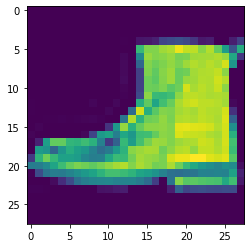

In [20]:
plt.imshow(X_train[3])

#### Creating the model using Sequential API

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.layers

In [24]:
hidden1 = model.layers[1]

In [25]:
hidden1.name

'dense'

In [26]:
model.get_layer('dense') is hidden1

True

In [27]:
weights,biases = hidden1.get_weights()

In [29]:
weights.shape 

(784, 300)

In [31]:
biases.shape

(300,)

In [32]:
###Compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])

In [35]:
#####Training and Evaluating the model
history = model.fit(X_train,y_train,epochs=30,verbose=2,validation_data=(X_valid,y_vali))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 - 10s - loss: 0.7176 - accuracy: 0.7674 - val_loss: 0.5026 - val_accuracy: 0.8290
Epoch 2/30
55000/55000 - 9s - loss: 0.4875 - accuracy: 0.8288 - val_loss: 0.4616 - val_accuracy: 0.8404
Epoch 3/30
55000/55000 - 9s - loss: 0.4425 - accuracy: 0.8429 - val_loss: 0.4231 - val_accuracy: 0.8558
Epoch 4/30
55000/55000 - 9s - loss: 0.4154 - accuracy: 0.8543 - val_loss: 0.3975 - val_accuracy: 0.8632
Epoch 5/30
55000/55000 - 9s - loss: 0.3956 - accuracy: 0.8598 - val_loss: 0.4070 - val_accuracy: 0.8604
Epoch 6/30
55000/55000 - 9s - loss: 0.3805 - accuracy: 0.8655 - val_loss: 0.3785 - val_accuracy: 0.8712
Epoch 7/30
55000/55000 - 9s - loss: 0.3667 - accuracy: 0.8691 - val_loss: 0.3994 - val_accuracy: 0.8576
Epoch 8/30
55000/55000 - 9s - loss: 0.3555 - accuracy: 0.8741 - val_loss: 0.3559 - val_accuracy: 0.8760
Epoch 9/30
55000/55000 - 9s - loss: 0.3438 - accuracy: 0.8779 - val_loss: 0.3459 - val_accuracy: 0.8798
Epoch 10/30
55

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

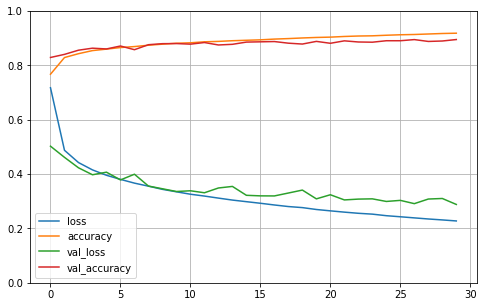

In [37]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [38]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 125us/sample - loss: 65.1256 - accuracy: 0.8510


[65.12557047395705, 0.851]

In [40]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
y_pred =  model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [45]:
import numpy as np
np.array(classes_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

In [46]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP using the sequential API

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
housing = fetch_california_housing()

In [8]:
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [6]:
model = keras.models.Sequential([keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
                                                   keras.layers.Dense(1)])

In [7]:
model.compile(loss = keras.losses.mean_squared_error,optimizer=keras.optimizers.SGD())

In [8]:
model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 111us/sample - loss: 1.2199 - val_loss: 7.8890
Epoch 2/30
11610/11610 [==============================] - 1s 65us/sample - loss: 0.7982 - val_loss: 68.5905
Epoch 3/30
11610/11610 [==============================] - 1s 93us/sample - loss: 4.3631 - val_loss: 0.4275
Epoch 4/30
11610/11610 [==============================] - 1s 71us/sample - loss: 0.4230 - val_loss: 0.4206
Epoch 5/30
11610/11610 [==============================] - 1s 89us/sample - loss: 0.4173 - val_loss: 0.4185
Epoch 6/30
11610/11610 [==============================] - 1s 73us/sample - loss: 0.4140 - val_loss: 0.5018
Epoch 7/30
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4274 - val_loss: 0.3972
Epoch 8/30
11610/11610 [==============================] - 1s 64us/sample - loss: 0.3980 - val_loss: 0.3914
Epoch 9/30
11610/11610 [==============================] - 1s 79us/sample - loss: 0.3961 - val

In [16]:
mse_test = model.evaluate(X_test,y_test)

5160/5160 [==============================] - 0s 37us/sample - loss: 0.3908


In [17]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

### Functional API

In [10]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=input_,outputs=output)

In [11]:
model.compile(loss = keras.losses.mean_squared_error,optimizer=keras.optimizers.SGD())

In [11]:
model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 2s 189us/sample - loss: 0.6952 - val_loss: 1.4017
Epoch 2/30
11610/11610 [==============================] - 1s 80us/sample - loss: 0.4219 - val_loss: 1.1498
Epoch 3/30
11610/11610 [==============================] - 1s 79us/sample - loss: 0.3991 - val_loss: 0.6639
Epoch 4/30
11610/11610 [==============================] - 1s 81us/sample - loss: 0.3795 - val_loss: 0.4047
Epoch 5/30
11610/11610 [==============================] - 1s 79us/sample - loss: 0.3716 - val_loss: 0.6321
Epoch 6/30
11610/11610 [==============================] - 1s 82us/sample - loss: 0.3649 - val_loss: 0.3722
Epoch 7/30
11610/11610 [==============================] - 1s 80us/sample - loss: 0.3644 - val_loss: 0.5259
Epoch 8/30
11610/11610 [==============================] - 1s 80us/sample - loss: 0.3583 - val_loss: 0.3722
Epoch 9/30
11610/11610 [==============================] - 1s 78us/sample - loss: 0.3562 - val_

In [12]:
mse_test = model.evaluate(X_test,y_test)

5160/5160 [==============================] - 0s 41us/sample - loss: 1.0694


In [26]:
###Passing two different features to wide (5 features) and Deep networks (6 features)

input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A,input_B],outputs=[output])

In [16]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [10]:
X_train_A,X_train_B = X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B = X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B = X_test[:,:5],X_test[:,2:]
X_new_A,X_new_B = X_test_A[:3],X_test_B[:3]

In [19]:
history = model.fit((X_train_A,X_train_B),y_train,epochs=30,validation_data=((X_valid_A,X_valid_B),y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 2s 151us/sample - loss: 2.0462 - val_loss: 1.7790
Epoch 2/30
11610/11610 [==============================] - 1s 82us/sample - loss: 0.6946 - val_loss: 0.6315
Epoch 3/30
11610/11610 [==============================] - 1s 83us/sample - loss: 0.5783 - val_loss: 0.7990
Epoch 4/30
11610/11610 [==============================] - 1s 81us/sample - loss: 0.5284 - val_loss: 0.5314
Epoch 5/30
11610/11610 [==============================] - 1s 81us/sample - loss: 0.4987 - val_loss: 0.4846
Epoch 6/30
11610/11610 [==============================] - 1s 81us/sample - loss: 0.4792 - val_loss: 0.4719
Epoch 7/30
11610/11610 [==============================] - 1s 79us/sample - loss: 0.4661 - val_loss: 0.4646
Epoch 8/30
11610/11610 [==============================] - 1s 80us/sample - loss: 0.4568 - val_loss: 0.4520
Epoch 9/30
11610/11610 [==============================] - 1s 81us/sample - loss: 0.4497 - val_

In [20]:
mse_test = model.evaluate((X_test_A,X_test_B),y_test)

5160/5160 [==============================] - 0s 42us/sample - loss: 0.4157


In [21]:
y_pred = model.predict((X_new_A,X_new_B))

### Using the Subclassing API to Build Dybamic Models

In [29]:
class WideAndDeepModel(keras.Model):
    def __init__(self,units=30,activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units,activation=activation)
        self.hidden2 = keras.layers.Dense(units,activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self,inputs):
        input_A,input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A,hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output,aux_output
    
    

In [30]:
model = WideAndDeepModel()

In [31]:
model.compile(loss=["mse","mse"],optimizer=keras.optimizers.SGD(lr=1e-3))

In [32]:
history = model.fit((X_train_A,X_train_B),(y_train,y_train),epochs=30,validation_data=((X_valid_A,X_valid_B),(y_valid,y_valid)))

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 2s 178us/sample - loss: 4.4822 - output_1_loss: 2.0377 - output_2_loss: 2.4434 - val_loss: 2.1280 - val_output_1_loss: 0.8861 - val_output_2_loss: 1.2418
Epoch 2/30
11610/11610 [==============================] - 1s 84us/sample - loss: 2.0252 - output_1_loss: 0.7928 - output_2_loss: 1.2321 - val_loss: 1.7427 - val_output_1_loss: 0.6512 - val_output_2_loss: 1.0913
Epoch 3/30
11610/11610 [==============================] - 1s 86us/sample - loss: 1.7351 - output_1_loss: 0.6519 - output_2_loss: 1.0830 - val_loss: 1.5564 - val_output_1_loss: 0.5870 - val_output_2_loss: 0.9693
Epoch 4/30
11610/11610 [==============================] - 1s 86us/sample - loss: 1.5669 - output_1_loss: 0.6022 - output_2_loss: 0.9647 - val_loss: 1.4322 - val_output_1_loss: 0.5576 - val_output_2_loss: 0.8745
Epoch 5/30
11610/11610 [==============================] - 1s 110us/sample - loss: 1.4524 - output_1_loss: 

In [22]:
total_loss,main_loss,aux_loss = model.evaluate([X_test_A,X_test_B],[y_test,y_test])

5160/5160 [==============================] - 0s 51us/sample - loss: 0.9570 - output_1_loss: 0.4211 - output_2_loss: 0.5364


In [23]:
y_pred_main,y_pred_aux = model.predict([X_new_A,X_new_B])

In [33]:
####Saving the model
model.save("my_keras_model.h5")

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

In [28]:
model = keras.models.load_model("my_keras_model.h5")

### Using Callbacks

In [17]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train,y_train,epochs=10,callbacks=[checkpoint_cb])

Train on 11610 samples
Epoch 1/10
11610/11610 [==============================] - 1s 78us/sample - loss: 0.7523
Epoch 2/10
11610/11610 [==============================] - 1s 52us/sample - loss: 0.6932
Epoch 3/10
11610/11610 [==============================] - 1s 50us/sample - loss: 0.7644
Epoch 4/10
11610/11610 [==============================] - 1s 48us/sample - loss: 4.8510
Epoch 5/10
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4291
Epoch 6/10
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4089
Epoch 7/10
11610/11610 [==============================] - 1s 63us/sample - loss: 1.4597
Epoch 8/10
11610/11610 [==============================] - 1s 56us/sample - loss: 2.2446
Epoch 9/10
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4229
Epoch 10/10
11610/11610 [==============================] - 1s 49us/sample - loss: 0.4781


In [18]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 66us/sample - loss: 4.9773 - val_loss: 0.4721
Epoch 2/10
11610/11610 [==============================] - 1s 54us/sample - loss: 0.4119 - val_loss: 0.5893
Epoch 3/10
11610/11610 [==============================] - 1s 52us/sample - loss: 1.3134 - val_loss: 0.4221
Epoch 4/10
11610/11610 [==============================] - 1s 55us/sample - loss: 0.3883 - val_loss: 0.6029
Epoch 5/10
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4428 - val_loss: 0.5624
Epoch 6/10
11610/11610 [==============================] - 1s 68us/sample - loss: 0.4199 - val_loss: 0.4362
Epoch 7/10
11610/11610 [==============================] - 1s 83us/sample - loss: 0.5199 - val_loss: 1.4005
Epoch 8/10
11610/11610 [==============================] - 1s 90us/sample - loss: 0.5906 - val_loss: 1.2340
Epoch 9/10
11610/11610 [==============================] - 1s 76us/sample - loss: 3.4924 - val_l

In [19]:
model = keras.models.load_model("my_keras_model.h5")

In [20]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb,early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.5036 - val_loss: 0.4086
Epoch 2/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.3754 - val_loss: 0.5684
Epoch 3/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4141 - val_loss: 0.5095
Epoch 4/100
11610/11610 [==============================] - 1s 50us/sample - loss: 0.4018 - val_loss: 0.7304
Epoch 5/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4423 - val_loss: 0.4799
Epoch 6/100
11610/11610 [==============================] - 1s 73us/sample - loss: 0.9176 - val_loss: 0.4166
Epoch 7/100
11610/11610 [==============================] - 1s 61us/sample - loss: 0.8371 - val_loss: 0.3725
Epoch 8/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.3693 - val_loss: 0.3763
Epoch 9/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.329

In [21]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"]/logs["loss"]))

In [23]:
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb,early_stopping_cb,PrintValTrainRatioCallback()])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
10784/11610 [==========================>...] - ETA: 0s - loss: 0.2774
val/train: 1.21
11610/11610 [==============================] - 1s 53us/sample - loss: 0.2759 - val_loss: 0.3338
Epoch 2/100
10976/11610 [===========================>..] - ETA: 0s - loss: 0.3441
val/train: 0.92
11610/11610 [==============================] - 1s 53us/sample - loss: 0.3388 - val_loss: 0.3118
Epoch 3/100
11392/11610 [============================>.] - ETA: 0s - loss: 0.2737
val/train: 1.41
11610/11610 [==============================] - 1s 54us/sample - loss: 0.2737 - val_loss: 0.3861
Epoch 4/100
10464/11610 [==========================>...] - ETA: 0s - loss: 0.2981
val/train: 1.25
11610/11610 [==============================] - 1s 50us/sample - loss: 0.2940 - val_loss: 0.3662
Epoch 5/100
11168/11610 [===========================>..] - ETA: 0s - loss: 0.4643
val/train: 0.69
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4586 

### Using TensorBoard for Visualization

In [2]:
import os
root_logdir = os.path.join(os.curdir,"my_logs")

In [3]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

In [4]:
run_logdir  = get_run_logdir()

In [5]:
run_logdir

'.\\my_logs\\run_21_06_23-13_21_27'

In [12]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid),callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 2s 169us/sample - loss: 0.8544 - val_loss: 1.0118
Epoch 2/30
11610/11610 [==============================] - 1s 72us/sample - loss: 3.3585 - val_loss: 271.3624
Epoch 3/30
11610/11610 [==============================] - 1s 65us/sample - loss: 25.2880 - val_loss: 4.4551
Epoch 4/30
11610/11610 [==============================] - 1s 65us/sample - loss: 16.2230 - val_loss: 1.3584
Epoch 5/30
11610/11610 [==============================] - 1s 65us/sample - loss: 0.5856 - val_loss: 0.5145
Epoch 6/30
11610/11610 [==============================] - 1s 62us/sample - loss: 0.5294 - val_loss: 0.4994
Epoch 7/30
11610/11610 [==============================] - 1s 62us/sample - loss: 0.5143 - val_loss: 0.4919
Epoch 8/30
11610/11610 [==============================] - 1s 64us/sample - loss: 0.5130 - val_loss: 0.5030
Epoch 9/30
11610/11610 [==============================] - 1s 62us/sample - loss: 0.5072 - 

In [13]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 15000.